# Methods
## CBIS-DDSM Dataset
The Curated Breast Imaging Subset (CBIS) of the Digital Database for Screening Mammography (DDSM) dataset, otherwise known as the CBIS-DDSM dataset contains data selected and curated by trained mammographers, from Massachusetts General Hospital, Wake Forest University School of Medicine, Sacred Heart Hospital, and Washington University of St. Louis School of Medicine.  



In [1]:
import warnings
from cadx.services.visual.config import VisualConfig
from cadx.data.explore.metadata import MassMeta, CalcMeta
from cadx.data import RAW_METADATA_FILEPATH
warnings.filterwarnings("ignore")

Developed through a grant from the DOD Breast Cancer Research Program, and the US Army Research, and Material Command, the dataset contains 892 mass cases and 753 calcification cases observed on the craniocaudal (CC) and the mediolateral oblique (MLO) views. The figure below exhibits the distribution of calcification and mass cases and abnormalities by pathology.

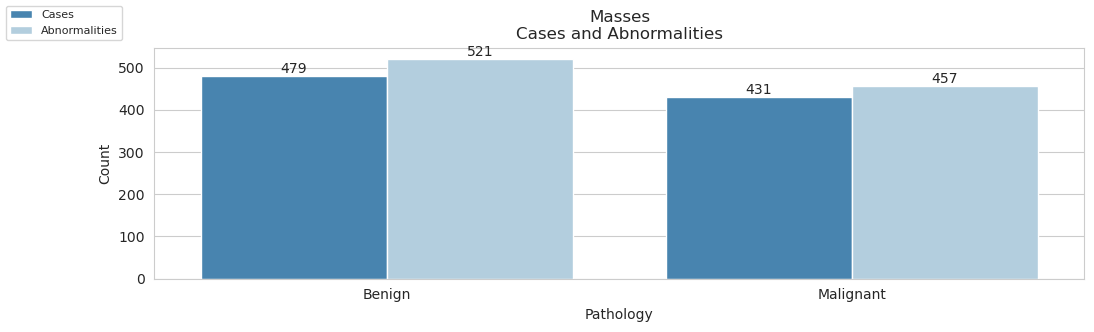

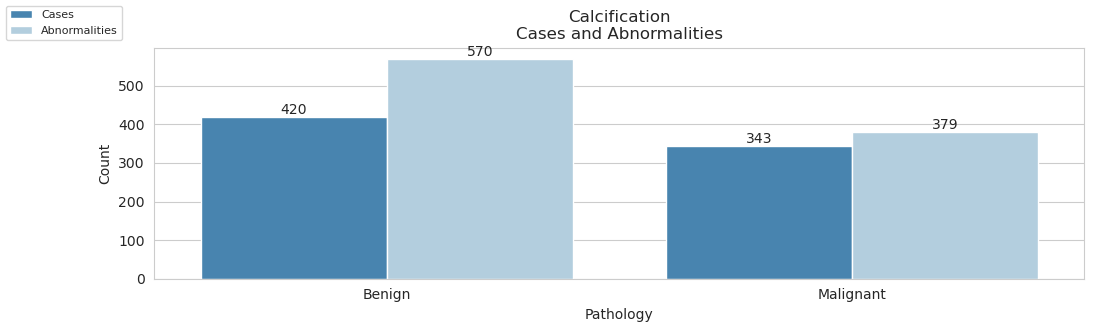

In [2]:
mass = MassMeta(train_filepath=RAW_METADATA_FILEPATH['mass_train'], test_filepath=RAW_METADATA_FILEPATH['mass_test'])
calc = CalcMeta(train_filepath=RAW_METADATA_FILEPATH['calc_train'], test_filepath=RAW_METADATA_FILEPATH['calc_test'])
mass.overview()
calc.overview()

### DICOM Format
The DDSM images were converted from lossless joint photographic experts group (JPEG) files to 16-bit grayscale Tag Image File Format (TIFF) files, which were later converted to the  Digital Imaging and Communications in Medicine (DICOM) format, the standard for medical imaging. The process was entirely lossless, preserving all information from the original DDSM files.

### Preprocessing
For CAD tasks requiring only the abnormality region of interest (ROI), a subset of images were focused and cropped around the bounding rectangle of the abnormality region of interest. 

An automated lesion segmentation algorithm based upon Chan and Vese' local level set framework estimated the spacial statistics of imaage regions to find the minimal energy point where the non-parametric model best fit the image.  For low constrast legions, a small local region is determined, and for heterogenous or noisy regions, a larger local region is assigned, producing precise contours around the region of interest, a considerable improvement over the original DDSM segmentation model.

Each image was annotated with: 
- the regions of interest (ROIs) for both calcifications and masses, 
- Breast Imaging Reporting and Data System (BI-RADS) descriptors for 
    - mass shape, 
    - mass margin, 
    - calcification type, 
    - calcification distribution, and 
    - breast density.

### Pathology and Mass Abnormalities
Depicted below, mass pathology as relates to mass features.

/home/john/projects/cadx/cadx/data/explore/metadata.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Pathology", "Mass Shape", "Count"]].sort_values(
/home/john/projects/cadx/cadx/data/explore/metadata.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[["Pathology", "Mass Margins", "Count"]].sort_values(


,index,Pathology,Mass Shape,Count
0,0,BENIGN,ARCHITECTURAL_DISTORTION,42
1,1,BENIGN,ASYMMETRIC_BREAST_TISSUE,17
2,2,BENIGN,FOCAL_ASYMMETRIC_DENSITY,18
3,3,BENIGN,IRREGULAR,93
4,4,BENIGN,IRREGULAR-ARCHITECTURAL_DISTORTION,3
5,18,MALIGNANT,ARCHITECTURAL_DISTORTION,61
6,19,MALIGNANT,ASYMMETRIC_BREAST_TISSUE,8
7,20,MALIGNANT,FOCAL_ASYMMETRIC_DENSITY,7
8,21,MALIGNANT,IRREGULAR,371
9,22,MALIGNANT,IRREGULAR-ARCHITECTURAL_DISTORTION,49


,index,Pathology,Mass Margins,Count
0,0,BENIGN,CIRCUMSCRIBED,349
1,1,BENIGN,CIRCUMSCRIBED-ILL_DEFINED,15
2,2,BENIGN,CIRCUMSCRIBED-MICROLOBULATED,2
3,3,BENIGN,CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFINED,1
4,4,BENIGN,CIRCUMSCRIBED-OBSCURED,21
5,14,MALIGNANT,CIRCUMSCRIBED,43
6,15,MALIGNANT,CIRCUMSCRIBED-ILL_DEFINED,14
7,16,MALIGNANT,CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFINED,2
8,17,MALIGNANT,CIRCUMSCRIBED-OBSCURED,1
9,18,MALIGNANT,CIRCUMSCRIBED-OBSCURED-ILL_DEFINED,1


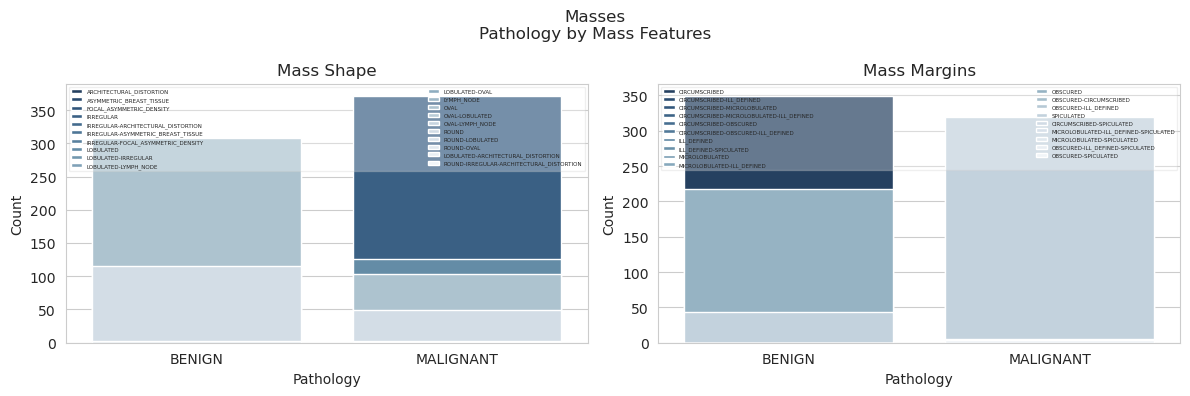

In [3]:
df1, df2 = mass.pathology_feature()
df1
df2

### Pathology and Classification Abnormalities

/home/john/projects/cadx/cadx/data/explore/metadata.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Pathology", "Calcification Type", "Count"]].sort_values(
/home/john/projects/cadx/cadx/data/explore/metadata.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[["Pathology", "Calcification Distribution", "Count"]].sort_values(


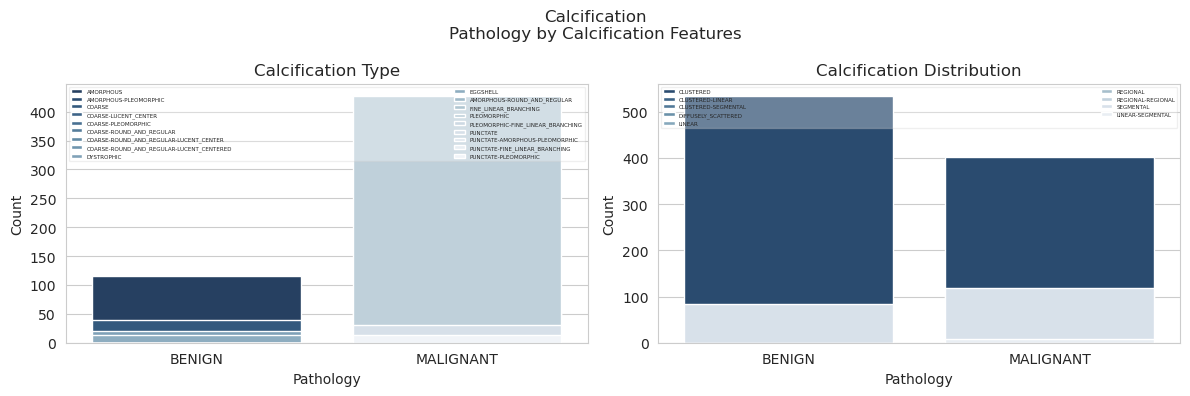

In [4]:
df1, df2 = calc.pathology_feature()

Then, images were rated on a scale from 1 to 5 on subtlety and difficulty, and assigned an overall BI-RADS assessment from 0 to 5 in accordance with the 6-point, BI-RADS assessment structure and classification system for mammography. Density, subtlety and BI-RADS assessment vis-a-vis pathology are related below.


### Data Splits
The CBIS-DDSM data were then split into a training set (80%) and a test set (20%), stratified by the BI-RADS assessment category, The calcification cases and the mass cases were split separately to ensure that both sets had cases of varying difficulty. The figure below outlines the distribution of mass and calcification cases and abnormalities for each dataset by pathology for the training and test sets.

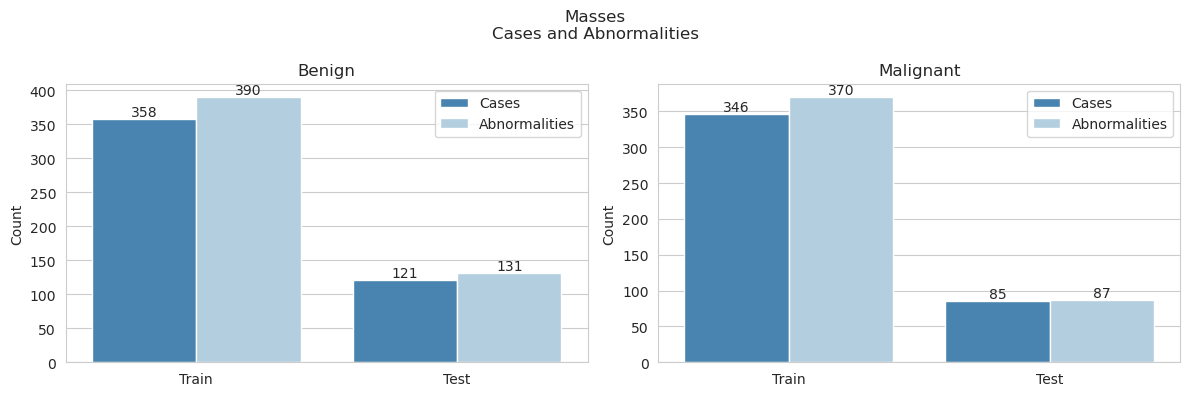

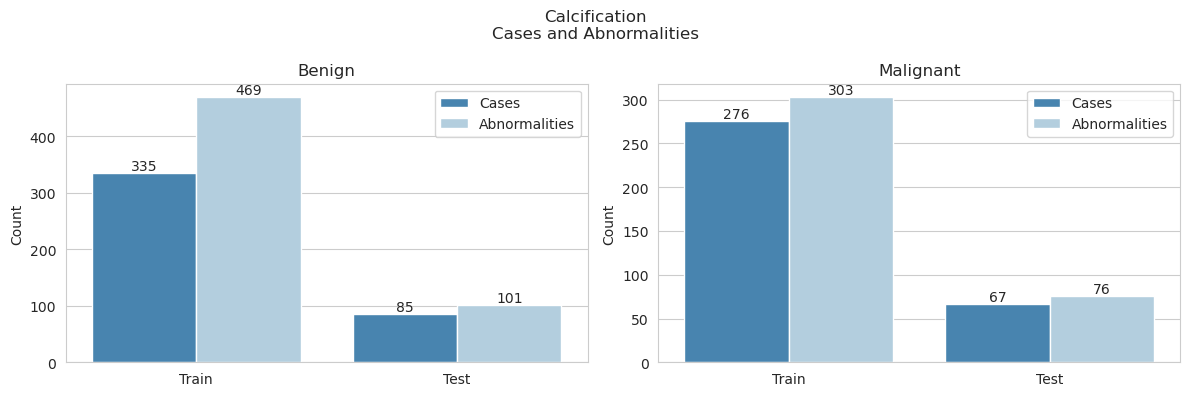

In [5]:
mass.summary()
calc.summary()

### Digital Images
All mammography are distributed as DICOM files and include both craniocaudal (CC) and mediolateral oblique (MLO) views of the mammograms. The region of interest (ROI) for each abnormality is represented as binary mask image of the same size as the mammogram.

### CBIS-DDSM Metadata
The individual files containing the metadata for calcification and mass training and test sets are:

| # | Dataset                    | Filename                            |
|---|----------------------------|-------------------------------------|
| 1 | Mass Training Set          | mass_case_description_train_set.csv |
| 2 | Mass Test Set              | mass_case_description_test_set.csv  |
| 3 | Calcification Training Set | calc_case_description_train_set.csv |
| 4 | Calcification Test Set     | calc_case_description_test_set.csv  |

These CSV files contain:   

| #  | Variable                   | Description                                                                                                     |
|----|----------------------------|-----------------------------------------------------------------------------------------------------------------|
| 1  | Patient ID                 | The first 7 characters of the image filenames in the case file.                                                 |
| 2  | Breast Density             | Density of the breast tissue according to BI-RADS Breast Density   Classification                               |
| 3  | Breast                     | Indicates which side, left or right, the image presents.                                                        |
| 4  | View                       | Indicates the projection in the screening mammography; either   craniocaudal (CC) or mediolateral oblique (MLO) |
| 5  | Abnormality Assessment     | The number of the adnormality for the image, since some cases have   multiple abnormalities.                    |
| 6  | Abnormality Type           | Either mass or calcification                                                                                    |
| 7  | Mass Shape                 | For mass dataset                                                                                                |
| 8  | Mass Margin                | For mass dataset                                                                                                |
| 9  | Calcification Type         | For calcification dataset                                                                                       |
| 10 | Calcification Distribution | For calcification dataset                                                                                       |
| 11 | BI-RADS Assessment         | Overall assessment of the abnormality    according to BI-RADS classification scheme.                            |
| 12 | Pathology                  | Benign, Benign without Callback, or Malignant                                                                   |
| 13 | Subtlelty Rating           | Radiologists' rating of difficulty in viewing the abnormality in the   image                                    |
| 14 | Image Filepaths            | Filepaths to the image, the cropped image, and the ROI image.                                                   |


### Pathology by Density
Women who have dense breast tissue have a greater risk of breast cancer, relative to women with less dense breast tissue. A second reason that breast tissue density is important, is that dense breast tissue can conceal breast masses and cancers, making it harder for radiologists to see the cancer on mammograms. The figure below exhibits the distribution of breast density cases vis-a-vis case pathology for the mass and calcification training and test sets.  

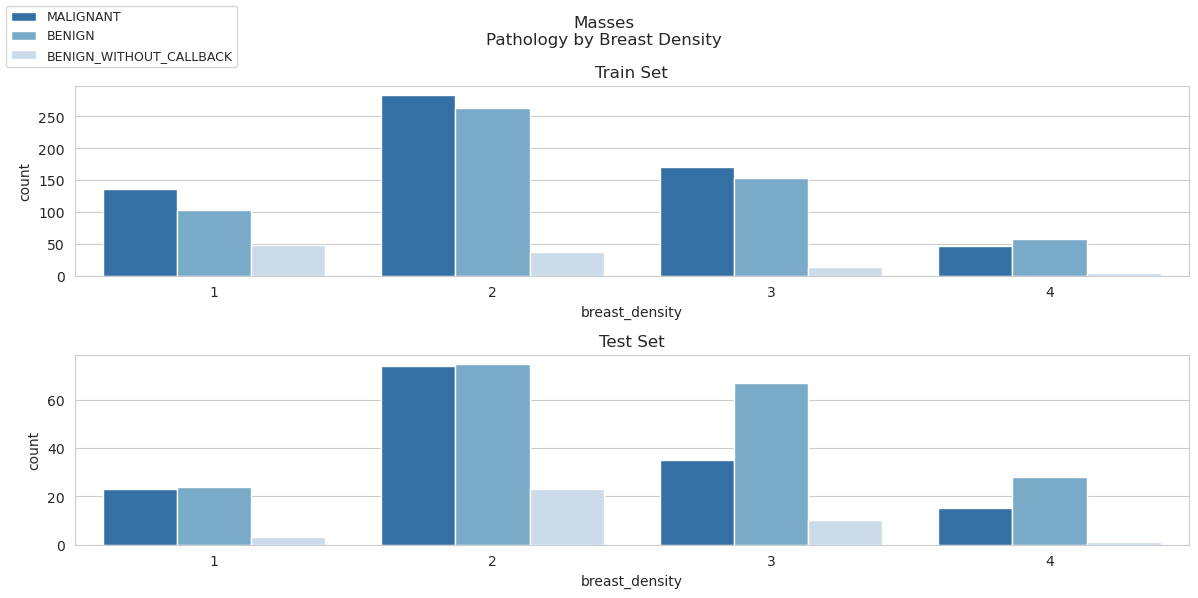

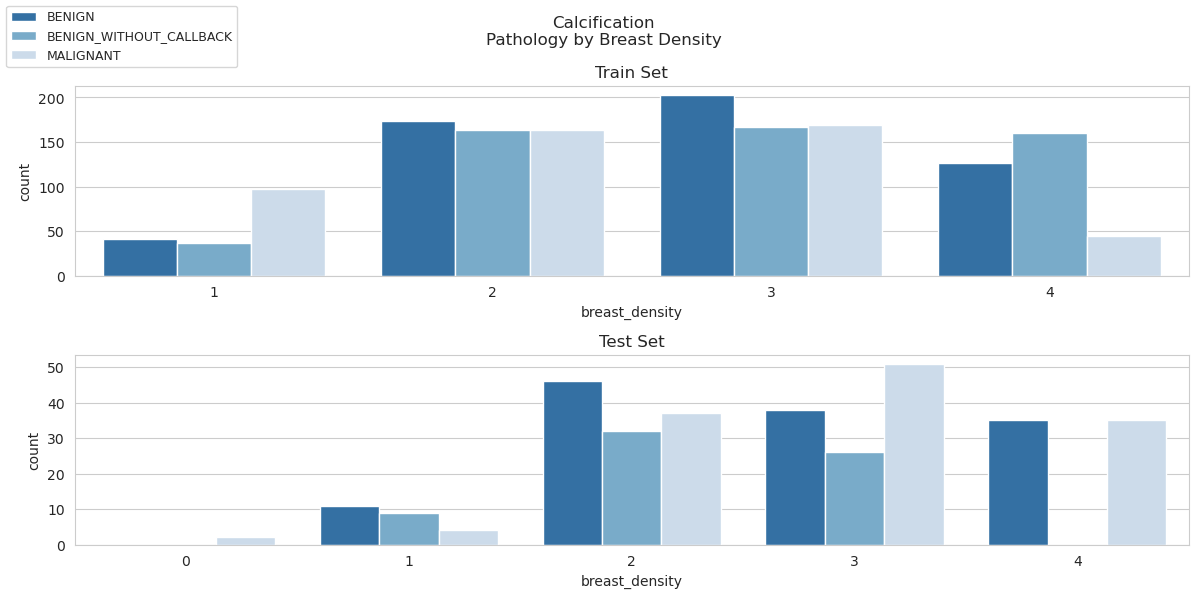

In [6]:
mass.pathology_density()
calc.pathology_density()